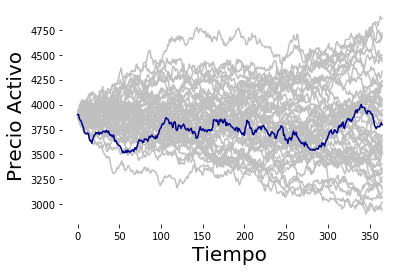

In [58]:
from __future__ import division
from numpy import *
from pylab import *
from numpy.random import rand
import scipy.stats
import matplotlib.pyplot as plt
from sodapy import Socrata

import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

#Simulacion de un MBG


norminv = scipy.stats.distributions.norm.ppf         
norm = scipy.stats.distributions.norm.cdf

M = 100               #Numero de caminos
d = 365                #Numero de pasos - En este caso se simulan diariamente
spot = 3900

T=1                    #Tiempo al vencimiento
delta_t = T/d
# time = arange(1,365,1)

y1 = rand(M,d)
z1 = norminv(y1)

initial_spot_asset1=spot*ones((M,1))

ASSET1 = zeros((M,d))
ASSET1 = append(initial_spot_asset1,ASSET1,axis=1) 


r = -0.0175           #Tasa de interes
sigma = 0.12      #Volatilidad

for i in range(0,M):
    for j in range(0,d):
        ASSET1[i,j+1] = ASSET1[i,j]*exp((r-0.5*sigma**2)*delta_t+sigma*sqrt(delta_t)*z1[i,j])


plt.plot(ASSET1[0:50,:].transpose(),c='silver')
plt.plot(ASSET1[0:1,:].transpose(),c='darkblue')
ylabel('Precio Activo',fontsize=20)
xlabel( 'Tiempo',fontsize=20)
box(on=None)

show()

In [45]:
client = Socrata("www.datos.gov.co",
                 "Oy0pJTAMwxGuC0c5SBC9nuuAU",
                 username="43xcm1yx3xh1eb5lv8e374g1s",
                 password="1zt8gsxe1mfh3h6fyh6281n1qitip816l2d6wnc1zvvs2dyidz")

USDCOP_TRM = client.get("mcec-87by", limit=10000)
USDCOP_TRM_df = pd.DataFrame.from_records(USDCOP_TRM)
USDCOP_TRM_df.sort_values('vigenciadesde',inplace=True)
USDCOP_TRM_df.reset_index(inplace=True)
USDCOP_TRM_df['valor'] = USDCOP_TRM_df['valor'].astype(float)
USDCOP_TRM_df['vigenciadesde'] = pd.to_datetime(USDCOP_TRM_df['vigenciadesde'])

In [59]:
fecha_inicial = datetime.datetime(2021, 7, 28)
df1 = pd.DataFrame(data=ASSET1.transpose())
df1['Fecha'] = fecha_inicial
fecha = fecha_inicial

for i in range(0,df1.shape[0]):
    df1['Fecha'].iloc[i] = fecha
    fecha += datetime.timedelta(days=1)

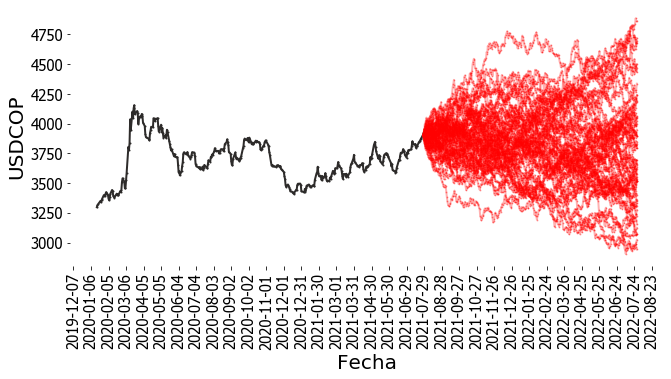

In [60]:
#------------------------GRÁFICO USDCOP VS SEÑAL MODELO-----------------------------------#
font = font_manager.FontProperties(family='Arial',weight='bold', style='normal', size=15)
tick_spacing1 = 30


fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(USDCOP_TRM_df['vigenciadesde'].tail(365),USDCOP_TRM_df['valor'].tail(365),marker='o', linestyle='solid',linewidth=2,color='#2C2A29',alpha=0.99,label='USDCOP',markersize=1)
for i in range(0,df1.shape[1]-50):
    ax1.plot(df1['Fecha'],df1[i],marker='o', linestyle='solid',linewidth=2,color='red',alpha=0.3,label='USDCOP',markersize=1)
# ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, None, None])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.box(on=None)

ylabel('USDCOP',fontsize=20)
xlabel( 'Fecha',fontsize=20)
# ax1.text(df_precios_os['Date'].iloc[-1],df_precios_os['CLOSE'].iloc[-1], '{0:.2f}'.format(df_precios_os['CLOSE'].iloc[-1]), color='#2C2A29', fontsize=12,weight='bold',backgroundcolor='white')
# ax2.text(df_precios_os['Date'].iloc[-1],df_precios_os['PRED'].iloc[-1], '{0:.2f}'.format(df_precios_os['PRED'].iloc[-1]), color='goldenrod', fontsize=12,weight='bold',backgroundcolor='white')

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=1.5, top=1.0)

plt.show()

In [38]:
df1.shape[1]

101